# 1. Basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
import tidy3d.web as web

In [2]:
freq0 = td.C_0 / 0.75 # 750 nm, tidy3d도 기본 단위는 micro 단위

print(td.C_0)
print(freq0)

# Meep과 다르게 Tidy3d에서는 Block 대신에 structure, Vector3 대신에 Box
square = td.Structure(
    geometry=td.Box(center = (0,0,0), size = (1.5, 1.5, 1.5)),
    medium = td.Medium(permittivity=2.0)
)

# Source 정하기
source = td.PointDipole(
    center = (-1.5, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey"
)

299792458000000.0
399723277333333.3


In [3]:
monitor = td.FieldMonitor(
    size = (td.inf, td.inf, 0),
    freqs=[freq0],
    name = "fields", # 딱히 지정은 안해줘도 되지만 지정해주면 웹 상에서 구분하기 용이함
    colocate= True # ?????????????
)

In [ ]:
sim = td.Simulation(
    size = (4, 3, 3), # Vector3로 따로 지정 안해줘도 괜찮음.
    grid_spec= td.GridSpec.auto(min_steps_per_wvl=25), # grid 알아서 설정
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0
)

In [6]:
sim.plot_3d()

In [7]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)

simulation grid is shaped [179, 147, 147] for 3 million cells.


In [8]:
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

print(data.log)

16:46:10 KST Created task 'quickstart' with task_id                             
             'fdve-cf04b7a2-411e-4d49-87f8-f48a475af904' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=675836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=779679;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\taskId]8;;\]8;id=675836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\=]8;;\]8;id=114894;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\fdve]8;;\]8;id=675836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\-cf04b7a2-411]8;;\
             ]8;id=675836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\e-4d49-87f8-f48a475af904']8;;\.

/mp/lib/python3.8/site-packages/rich/live.py:229: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

16:46:13 KST status = queued

16:46:18 KST status = preprocess

16:46:20 KST Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

16:46:21 KST running solver

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

16:46:27 KST early shutoff detected at 20%, exiting.

             status = postprocess

16:46:30 KST status = success

             View simulation result at                                          
             ]8;id=915117;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=46003;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\taskId]8;;\]8;id=915117;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\=]8;;\]8;id=377024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\fdve]8;;\]8;id=915117;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\-cf04b7a2-411]8;;\
             ]8;id=915117;https://tidy3d.simulation.cloud/workbench?taskId=fdve-cf04b7a2-411e-4d49-87f8-f48a475af904\e-4d49-87f8-f48a475af904']8;;\.

16:46:32 KST loading simulation from data/data.hdf5

Simulation domain Nx, Ny, Nz: [179, 147, 147]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 4.0184e+06.
Using subpixel averaging: True
Number of time steps: 7.5140e+03
Automatic shutoff factor: 1.00e-05
Time step (s): 3.9959e-17


Compute source modes time (s):     0.1426
Compute monitor modes time (s):    0.0004
Rest of setup time (s):            1.8956

Running solver for 7514 time steps...
- Time step    300 / time 1.20e-14s (  4 % done), field decay: 1.00e+00
- Time step    498 / time 1.99e-14s (  6 % done), field decay: 1.00e+00
- Time step    601 / time 2.40e-14s (  8 % done), field decay: 2.60e-01
- Time step    901 / time 3.60e-14s ( 12 % done), field decay: 2.62e-03
- Time step   1202 / time 4.80e-14s ( 16 % done), field decay: 6.38e-05
- Time step   1502 / time 6.00e-14s ( 20 % done), field decay: 2.22e-06
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):                   0.6197
Data write time (s):               0.0080



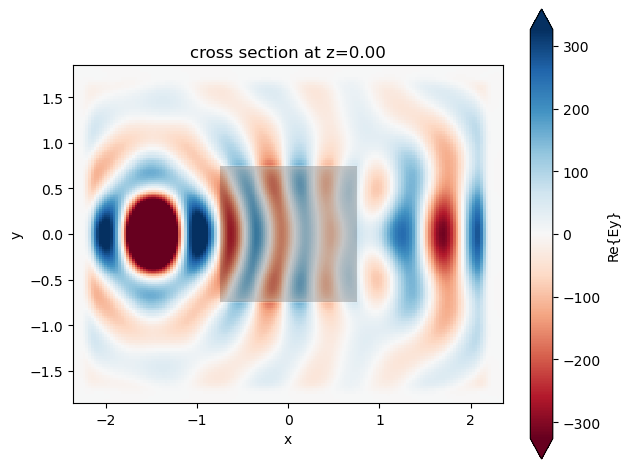

In [9]:
ax = data.plot_field("fields", "Ey", z = 0)